**CONFRONTO TRA ALGORITMI PER IL CALCOLO INTEGRALE**

Per effettuare il confronto sono stati implementati i seguenti algorirmi:
- Metodo della Formula Composta dei Trapezi
- Metodo della Formula Composta di Simpson
- Metodo della Formula Composta di Bool

Effettuando un test sull'errore assoluto commesso da questi algoritmi al crescere della suddivisione (N) dell'intervallo di integrazione

Il test è stato effettuato su diverse funzioni

**Funzioni da confrontare:**
- Grado 1: 8x - 4
- Grado 3: 4x^3 - 3x^2 + x - 7
- Grado 5: 9x^5 + 3x^4 + 2x^3 - 5x^2 + 11x - 32

L'intervallo di integrazione è il medesimo per i 3 test, ovvero [-10, 10]
Il numero massimo di divisioni dell'intervallo [-10, 10] è stato 200

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def formulaTrapezio(f, a, b):
    return ((b-a)/2) * (f(a) + f(b))

In [4]:
def formulaSimpson(f, a, b):
    t = np.linspace(a, b, 3)
    return ((t[2] - t[0])/6) * (f(t[0]) + 4*f(t[1]) + f(t[2]))

In [5]:
def formulaBoole(f, a, b):
    t = np.linspace(a, b, 5)
    return float(((t[4] - t[0]) / 90) * (7*f(t[0]) + 32*f(t[1]) + 12*f(t[2]) + 32*f(t[3]) + 7*(t[4])))

In [6]:
def formulaComposta(f, formula, a, b, N):
    s = np.linspace(a, b, N + 1)
    S = []
    for i in range (N):
        S.append(float(formula(f, s[i], s[i + 1])))
    return sum(S)

In [7]:
def f1(x):
    return 8*x - 4

In [8]:
def F1(x):
    return 4*x**2 - 4*x

In [9]:
def f3(x):
    return 4*x**3 - 3*x**2 + x - 7

In [10]:
def F3(x):
    return x**4 - x**3 + x**2 / 2 - 7*x

In [11]:
def f5(x):
    return 9*x**5 + 3*x**4 + 2*x**3 - 5*x**2 + 11*x - 32

In [12]:
def F5(x):
    return (3 / 2)*x**6 + (3 / 5)*x**5 + x**4 / 2 - (5 / 3)*x** 3 + (11 / 2)*x**2 - 32*x

In [13]:
def I(F, a, b):
    return F(b) - F(a)

In [14]:
a = -10
b = 10

In [15]:
def test_calcolo_integrale(f, F, a, b, N_INTERVALLI, grado):
    err_Trapezio = []
    err_Simpson = []

    I_REALE =  I(F, a, b)

    for N in range(N_INTERVALLI):
        IC_TRAPEZIO = formulaComposta(f,  formulaTrapezio, a, b, N)
        IC_SIMPSON = formulaComposta(f,  formulaSimpson, a, b, N)

        err_T = abs(I_REALE - IC_TRAPEZIO)
        err_S = abs(I_REALE - IC_SIMPSON)

        err_Trapezio.append(err_T)
        err_Simpson.append(err_S)

    plt.figure(1)
    plt.semilogy(range(N_INTERVALLI), err_Trapezio, 'b-*', label='Trapezio composto')
    plt.semilogy(range(N_INTERVALLI), err_Simpson, 'r-*', label='Simpson composto')

    plt.xlabel('N')
    plt.ylabel('Errore')
    plt.legend()
    plt.title('Errore al variare di N (f(x) di' + str(grado) + "grado)")
    plt.show()

**OSSERVAZIONI SUI RISULTATI**

Osservando il grafico è notabile che nessuno dei tre metodi produce alti errori nel calcolo dell'integrale della funzione di primo grado

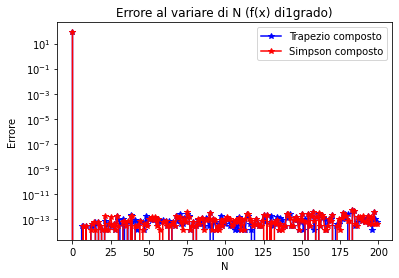

In [16]:
test_calcolo_integrale(f1, F1, a, b, 200, 1)

In questo grafico è osservabile come la formula composta del Trapezio produca un errore altamente maggiore rispetto a Simpson e Boole, questo accade perchè la formula compsta del trapezio è accurata con polinomi di grado minore o uguale ad 1

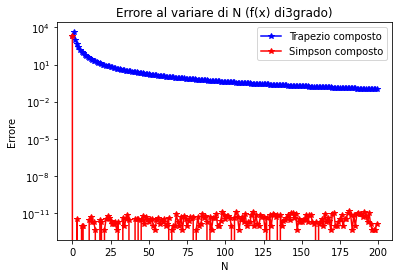

In [17]:
test_calcolo_integrale(f3, F3, a, b, 200, 3)

Medesima cosa accade in questo grafico dove possiamo notare che anche la formula composta di Simpson produce un errore elevat, comunque minore rispetto all'errore prodotto dal metodo del Trapezio composto.
Ciò non accade  con la formula composta di Boole che ha come precisione 5, ecco perchè l'errore prodotto è minimo rispetto agli altri metodi

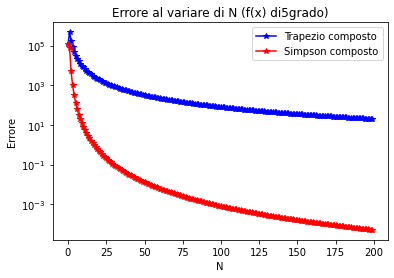

In [18]:
test_calcolo_integrale(f5, F5, a, b, 200, 5)

Infine si nota come l'errore cresce all'aumentare del grado della funzione:
- Grado 1: Errore minimo vicino a 10^-13
- Grado 3: Errore minimo vicino a 10^-11
- Grado 5: Errore minimo vicino a 10^-9